<a href="https://colab.research.google.com/github/SalhRosas/Pepperdine/blob/main/Rosas_Salvador_Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>



# **Homework 1:**


---


- Please complete each of the problems below
- Show all your code to complete each question
- Provide sentence(s) explaining your solution
- For your decision tree, please be sure to output the actual image directly in python as opposed to a .dot file


It is recommended that you read chapters 3, 4, and 6 to prepare for this module!

**Please use the following dataset for problems 1 - 6**





In [39]:

import pandas as pd

URL_adult='https://raw.githubusercontent.com/kamranbakhtiari/DESC624/main/Adult'
adult = pd.read_csv(URL_adult, sep=',')
len(adult)


25000

In [40]:
#Removing unwanted characters in data
adult = adult[(adult.astype(str) != '?').all(axis=1)]
len(adult) #23171

23171

**1. Partition the data set, so that 50% of the records are included in the training data set and 50% are included in the test data set.  Use a bar graph to conifrm your proportions**





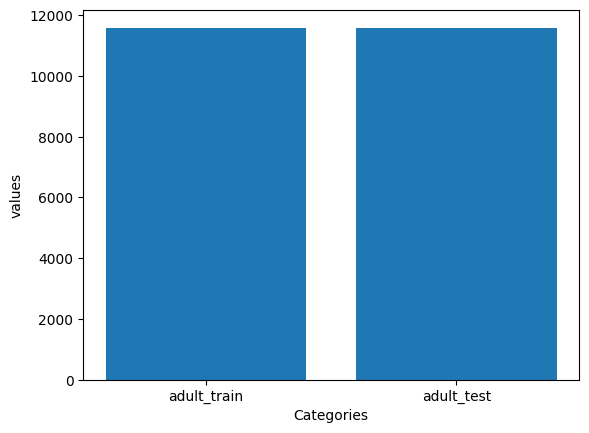

In [41]:
### Show your Code Here ###
from sklearn.model_selection import train_test_split
import random

adult_train, adult_test = train_test_split(adult, test_size = 0.5, random_state = 5) #50% test_data and 50% training_data partition
adult_train.shape

import numpy as np
categories = np.array(["adult_train", "adult_test"])
sizes = np.array([len(adult_train), len(adult_test)])

import matplotlib.pyplot as plt
plt.bar(categories, sizes)
plt.ylabel("values")
plt.xlabel("Categories")
plt.show()

Provide sentence(s) explaining your solution
After creating a training and test variables for the data set the histogram is showing a 50% split.

**2. Identify the total number of records in the training data set, and how many records in the training data set have an income value of < 50k**

In [42]:
### Show your Code Here ###
adult_train.shape #We now have 12,500 records half of the total 25k from Q1 above


(11585, 15)

In [43]:
adult_train['income'].value_counts()
#adult_train_income_count 

<=50K.    8687
>50K.     2898
Name: income, dtype: int64

We now have 11,585 records half of the total 25k from Q1 above
There are 8687 recorded individuals with an income value of <=50k

**3. Use your answers from the previous excercise to calculate how many records with income >50k you need to resmaple in order to have 35% of the rebalanced data set have incomes of >50k**

In [44]:
### Show your Code Here ###
x= (0.35*(12500)-3028)/0.65 #x=2072
x

2072.3076923076924

In [45]:
#our_resample = to_resample.sample( n= 2072, replace = True)
#our_resample

To rebalance the training data we need to sample 2072 records from the records with income >50K.

**4. Perform the rebalancing described in the previous exercise and confirm that 35% of the records in the rebalanced data set have incomes >50k**

In [46]:
to_resample = adult_train.loc[adult_train["income"]==">50K."]
to_resample

our_resample = to_resample.sample(n = 2072, replace =True)
our_resample



adult_train_rebal =pd.concat([adult_train, our_resample])
adult_train_rebal.shape

(13657, 15)

In [47]:
#adult.replace('?', np.NaN, inplace =True)
adult.head()

,age,workclass,demogweight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K.
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K.
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K.
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K.
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K.


In [48]:
# Rebalancing 
adult_train_rebal['income'].value_counts()

<=50K.    8687
>50K.     4970
Name: income, dtype: int64

I created a a subset of data with the sample function that includes the 2072 records needed for the balancing of new dataset our_sample to get the desired rartio of 35%.

The total number of records with the income > 50K is 4970. 

**5. Validate your partition by performing a two-sample Z-test for the difference in means for the mean age in the training set versus the mean age in the test set?**

<Axes: ylabel='Frequency'>

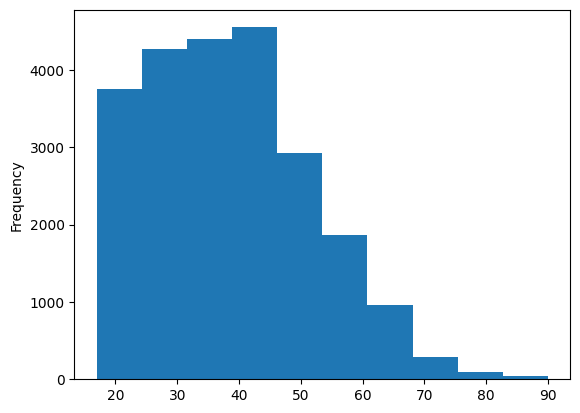

In [49]:
### Show your Code Here ###
from scipy import stats
adult['age_z']=stats.zscore(adult['age'])

adult

adult["age"].plot(kind='hist')



<Axes: ylabel='Frequency'>

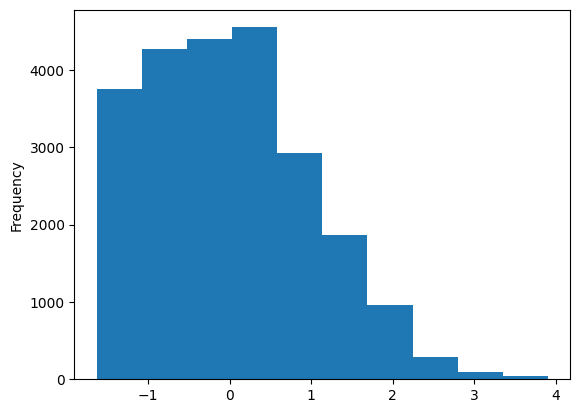

In [50]:
adult["age_z"].plot(kind='hist') #z-score standard deviation ranking

In [51]:
from scipy import stats
from statsmodels.stats.weightstats import ztest as ztest
import numpy as np 

#run ztest to see the diiference in means is 0
ztest(adult_train['age'], adult_test['age'], value =0)

(-0.2898668634916566, 0.771918092876884)

Provide sentence(s) explaining your solution: 
The test statistic is -0.29 and the p-value is 0.77, which is greater than 0.05. We accept the null hypothesis there is no significant difference between the two samples.

In [52]:
adult

,age,workclass,demogweight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_z
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K.,0.039060
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K.,0.872307
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K.,-0.036690
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K.,1.099557
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K.,-0.794188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,52,Private,89041,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K.,1.023807
24995,41,Private,112507,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,60,United-States,<=50K.,0.190559
24996,19,Private,236940,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,<=50K.,-1.475935
24997,33,Private,278514,HS-grad,9,Divorced,Craft-repair,Own-child,White,Female,0,0,42,United-States,<=50K.,-0.415439


**6. Validate your partition by performing a two-sample Z-test for the difference in proportion of >50k records in the training set versus the proportion of >50k records in the test set?**

<Axes: >

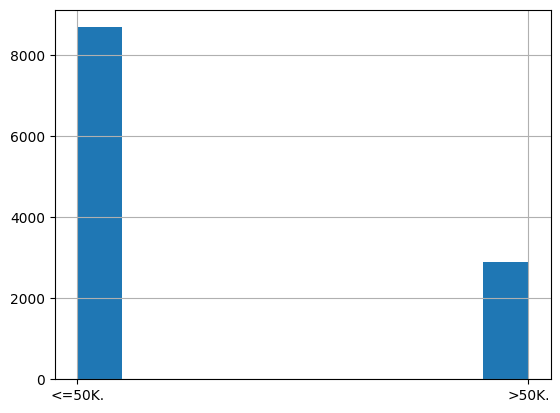

In [53]:
#adult.info()

#len(adult)

adult_train['income'].hist()

<Axes: >

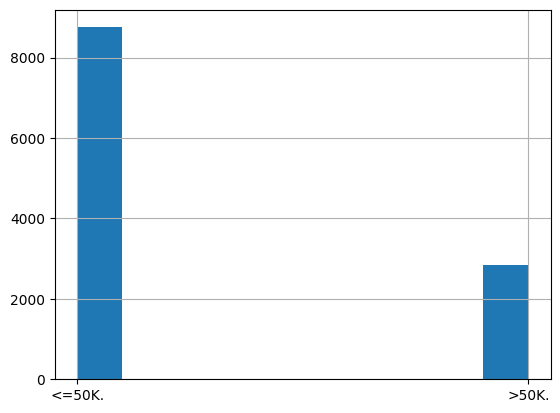

In [54]:
adult_test['income'].hist()

Provide sentence(s) explaining your solution:
We see that there are far less people making greater than 50K per year in the histograms.

**Please use the following dataset for problems 7 - 8**

In [55]:
import pandas as pd

URL_loan_training='https://raw.githubusercontent.com/kamranbakhtiari/DESC624/main/Loans_Training'
URL_loan_test='https://raw.githubusercontent.com/kamranbakhtiari/DESC624/main/Loans_Test'

# Split the dataset into training and testing data
loan_test = pd.read_csv(URL_loan_test)
loan_test


,Approval,Debt-to-Income Ratio,FICO Score,Request Amount,Interest
0,F,0.00,413,2000,900.0
1,F,0.00,449,1000,450.0
2,F,0.00,454,6000,2700.0
3,F,0.00,456,1000,450.0
4,F,0.00,457,1000,450.0
...,...,...,...,...,...
49693,T,0.38,662,14000,6300.0
49694,T,0.38,664,16000,7200.0
49695,T,0.38,676,4000,1800.0
49696,T,0.38,680,6000,2700.0


In [68]:
### Show your Code Here ###
loan_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150302 entries, 0 to 150301
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Approval              150302 non-null  object 
 1   Debt-to-Income Ratio  150302 non-null  float64
 2   FICO Score            150302 non-null  int64  
 3   Request Amount        150302 non-null  int64  
 4   Interest              150302 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 5.7+ MB


**7. Create a CART model using the training data set that predicts Approval using Debt to Income Ratio, FICO score, and Request Amount. Visualize the decision Tree (make sure the decision tree appears directly in this workbook, not a seperate .dot file).  Describe the first few splits in the decision tree.  What do the values in the brackets represent?  The sample size for each node?  the Root?**

In [69]:
### Show your Code Here ###
loan_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49698 entries, 0 to 49697
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Approval              49698 non-null  object 
 1   Debt-to-Income Ratio  49698 non-null  float64
 2   FICO Score            49698 non-null  int64  
 3   Request Amount        49698 non-null  int64  
 4   Interest              49698 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.9+ MB


In [70]:
loan_training.head()

,Approval,Debt-to-Income Ratio,FICO Score,Request Amount,Interest
0,F,0.0,397,1000,450.0
1,F,0.0,403,500,225.0
2,F,0.0,408,1000,450.0
3,F,0.0,408,2000,900.0
4,F,0.0,411,5000,2250.0


In [71]:
loan_training.corr() #compute correlation of columns to visualize data

<ipython-input-71-537cbdfa3a46>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  loan_training.corr() #compute correlation of columns to visualize data


,Debt-to-Income Ratio,FICO Score,Request Amount,Interest
Debt-to-Income Ratio,1.000000,-0.070586,0.129207,0.129207
FICO Score,-0.070586,1.000000,0.153920,0.153920
Request Amount,0.129207,0.153920,1.000000,1.000000
Interest,0.129207,0.153920,1.000000,1.000000


In [72]:
import pandas as pd
import numpy as np
import statsmodels.tools.tools as stattools
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import requests

In [82]:
y_7= loan_training[['Approval']]
y_7names = ["F","T"]

In [83]:
x_7 = loan_training.drop(columns= ['Approval'])
x_7


,Debt-to-Income Ratio,FICO Score,Request Amount,Interest
0,0.00,397,1000,450.0
1,0.00,403,500,225.0
2,0.00,408,1000,450.0
3,0.00,408,2000,900.0
4,0.00,411,5000,2250.0
...,...,...,...,...
150297,0.38,709,19000,8550.0
150298,0.38,722,17000,7650.0
150299,0.38,747,11000,4950.0
150300,0.39,679,10000,4500.0


In [105]:
dt = DecisionTreeClassifier(criterion= 'gini', max_leaf_nodes=4)
dt.fit(x_7, y_7)

DecisionTreeClassifier(max_leaf_nodes=4)

In [106]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO
from six import StringIO
from IPython.display import Image
from pydot import graph_from_dot_data
import pandas as pd
import numpy as np

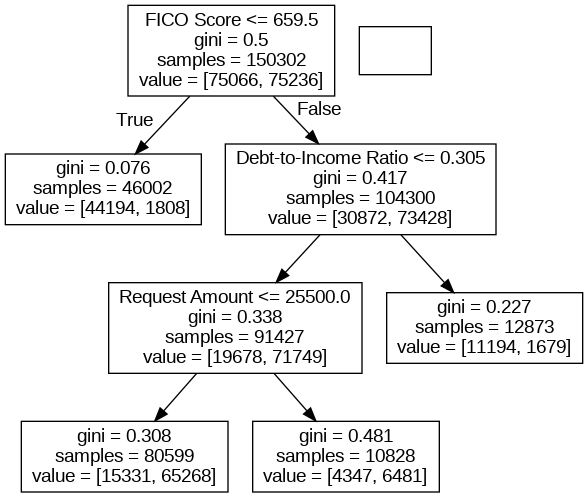

In [107]:
dot_data = StringIO()
export_graphviz(dt, out_file = dot_data, feature_names= x_7.columns)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Provide sentence(s) explaining your solution:
-  Describe the first few splits in the decision tree. What do the values in the brackets represent? The sample size for each node? the Root?

If you have a FICO Score of <= 660 then the candidates loan Approval will be rejected(sample size: 46,002), however if their FICO Score is greater than 660, then their debt-to-income ration will be assessed and if greater than 31% their application will be rejected(sample size: 12873). If their debt-to-income ration is less than 31% they will be assessed on their loan request amount. Candidates requesting more than 25500 will be rejected(sample size: 10828).
- The values in the brackets tell you how many samples at the given node fall into each category. For example, referring to the root node 75236 samples were belong to the approved category while 75066 samples belong to the rejected category. 
- The root node is the the topmost decision node being being an applicant with a FICO Score <= 660 will be rejected, and the samplke size for this data set is 150,302.


**8. Create a CART model using the test data set that uses the same target and predictor variables.  Visualize the decision Tree (make sure the decision tree appears directly in this workbook, not a seperate .dot file).  Describe the first few splits in the decision tree.  What do the values in the brackets represent?  The sample size for each node?  the Root?  Does the tree built using the test data match the tree built using the training data?**

In [124]:
### Show your Code Here ###
import pandas as pd
import numpy as np
import statsmodels.tools.tools as stattools
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import requests

In [127]:
y_8= loan_test[['Approval']]
y_8names = ["Not Approved","Approved"]

In [128]:
x_8 = loan_test.drop(columns= ['Approval'])
x_8

,Debt-to-Income Ratio,FICO Score,Request Amount,Interest
0,0.00,413,2000,900.0
1,0.00,449,1000,450.0
2,0.00,454,6000,2700.0
3,0.00,456,1000,450.0
4,0.00,457,1000,450.0
...,...,...,...,...
49693,0.38,662,14000,6300.0
49694,0.38,664,16000,7200.0
49695,0.38,676,4000,1800.0
49696,0.38,680,6000,2700.0


In [129]:
dt = DecisionTreeClassifier(criterion= 'gini', max_leaf_nodes=4)
dt.fit(x_8, y_8)

DecisionTreeClassifier(max_leaf_nodes=4)

In [130]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO
from six import StringIO
from IPython.display import Image
from pydot import graph_from_dot_data
import pandas as pd
import numpy as np

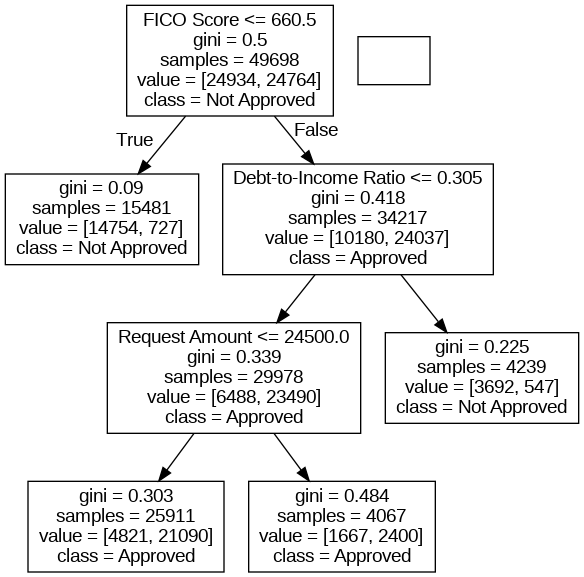

In [131]:
dot_data = StringIO()
export_graphviz(dt, out_file = dot_data, feature_names= x_8.columns,class_names = y_8names)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Provide sentence(s) explaining your solution:

Describe the first few splits in the decision tree. What do the values in the brackets represent? The sample size for each node? the Root?
If you have a FICO Score of <= 661 then the candidates loan Approval will be rejected(sample size:15,481), however if their FICO Score is greater than 661, then their debt-to-income ration will be assessed and if greater than 31% their application will be rejected(sample size: 4239). If their debt-to-income ration is less than 31% they will be assessed on their interest amount. Candidates with interest more than 11025 will be rejected(sample size: 4067).

The values in the brackets tell you how many samples at the given node fall into each category. For example, referring to the root node 34217 samples were belong to the approved category while 15481 samples belong to the rejected category.
The root node is the the topmost decision node being being an applicant with a FICO Score <= 661 will be rejected, and the sample size for this data set is 49,698.